<a href="https://colab.research.google.com/github/ZHongli626/Supply_Chain_based_studies/blob/main/Retail_supply_chain_ABM_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a replication of the work by Linnart Felkl. Link: https://www.supplychaindataanalytics.com/simple-distribution-supply-chain-abm-in-python/

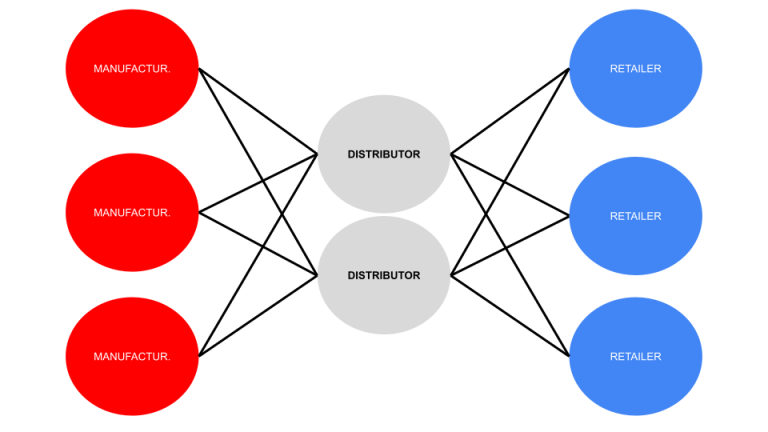

In [39]:
import random
import numpy as np
import pandas as pd

In [1]:
# RETAILER class
class Retailer:
    def __init__(self, inventory_level): # 'Property'
        self.inventory_level = inventory_level

    def order_from_distributor(self, quantity): # 'Function'
        if quantity > self.inventory_level:
            order_quantity = quantity - self.inventory_level
            return order_quantity
        else:
            return 0

    def receive_shipment(self, quantity):
        self.inventory_level += quantity

# DISTRIBUTOR class
class Distributor:
    def __init__(self, inventory_level):
        self.inventory_level = inventory_level

    def order_from_manufacturer(self, quantity):
        if quantity > self.inventory_level:
            order_quantity = quantity - self.inventory_level
            return order_quantity
        else:
            return 0

    def receive_shipment(self, quantity):
        self.inventory_level += quantity

# MANUFACTURER class
class Manufacturer:
    def __init__(self, production_capacity):
        self.production_capacity = production_capacity

    def produce_goods(self, quantity):
        if quantity <= self.production_capacity:
            return quantity
        else:
            return self.production_capacity

In [47]:
# SIMULATION implementation
def simulate_supply_chain(retailer :Retailer, 
                          distributor :Distributor, 
                          manufacturer :Manufacturer, 
                          num_iterations :int
                         ) -> None:
    """ supply chain simulation

    simulates a supply chain with a retailer, a distributor, and a manufacturer;
    simulates over a specified amount of iteration;
    uses random to generate random order quantities

    Args:
    # retailer (Retailer): retailer agent that place orders at distributor
    # distributor (Distributor): distributor that palces order at manufacturer
    # manufacturer (Manufacturer): manufacturer that ships to distrubtor
    # num_iterations (int): 

    Returns:
    # None
    
    """
    for i in range(num_iterations):        
        # retailer places order with distributor
        np.random.seed(0)
        # order_quantity = retailer.order_from_distributor(random.randint(2, 20))
        retailer_order = np.random.randint(2, 20, size = num_iterations)[i]
        order_quantity = retailer.order_from_distributor(retailer_order)
        order_quantity_0 = order_quantity
        
        # distributor places order with manufacturer
        order_quantity = distributor.order_from_manufacturer(order_quantity)
        order_placed = order_quantity
        
        # manufacturer produces goods and ships to distributor
        shipped_quantity = manufacturer.produce_goods(order_quantity)
        distributor.receive_shipment(shipped_quantity)
        distributor_quantity = shipped_quantity
        
        # distributor ships goods to retailer
        shipped_quantity = distributor.inventory_level
        retailer.receive_shipment(shipped_quantity)
        retailer_quantity = shipped_quantity

        # print retailer_order, order_quantity, order_placed 
        # and received_quantity of the distributor and the retailer
        print((retailer_order, order_quantity_0, order_placed, 
               distributor_quantity, retailer_quantity))

In [48]:
simulate_supply_chain(retailer = Retailer(1), # inventory_level
                      distributor = Distributor(6), # inventory_level
                      manufacturer = Manufacturer(1), # production_capacity
                      num_iterations = 20)

(14, 13, 7, 1, 7)
(17, 9, 2, 1, 8)
(2, 0, 0, 0, 8)
(5, 0, 0, 0, 8)
(5, 0, 0, 0, 8)
(9, 0, 0, 0, 8)
(11, 0, 0, 0, 8)
(6, 0, 0, 0, 8)
(8, 0, 0, 0, 8)
(14, 0, 0, 0, 8)
(3, 0, 0, 0, 8)
(8, 0, 0, 0, 8)
(9, 0, 0, 0, 8)
(16, 0, 0, 0, 8)
(19, 0, 0, 0, 8)
(7, 0, 0, 0, 8)
(15, 0, 0, 0, 8)
(10, 0, 0, 0, 8)
(11, 0, 0, 0, 8)
(18, 0, 0, 0, 8)


In [21]:
Retailer(14).order_from_distributor(15)

1